In [1]:
import pandas as pd

creditcard_df = pd.read_excel('default of credit card clients.xls', header=1) #skip the first row (skiprows=None) 
creditcard_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
creditcard_df.columns = [x.title() for x in creditcard_df.columns] #Capital letter for the first letter
creditcard_df = creditcard_df.rename(index=str, columns={"Pay_0": "Pay_1", 'Default Payment Next Month': 'Default payment next month'})
creditcard_df = creditcard_df.drop('Id', axis=1)
print creditcard_df.shape
creditcard_df.head()

(30000, 24)


,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# We could also get overall info for the dataset
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Limit_Bal                     30000 non-null int64
Sex                           30000 non-null int64
Education                     30000 non-null int64
Marriage                      30000 non-null int64
Age                           30000 non-null int64
Pay_1                         30000 non-null int64
Pay_2                         30000 non-null int64
Pay_3                         30000 non-null int64
Pay_4                         30000 non-null int64
Pay_5                         30000 non-null int64
Pay_6                         30000 non-null int64
Bill_Amt1                     30000 non-null int64
Bill_Amt2                     30000 non-null int64
Bill_Amt3                     30000 non-null int64
Bill_Amt4                     30000 non-null int64
Bill_Amt5                     30000 non-null int64
Bill_Amt6                     30000 non-null int64
Pay_Amt1                     

In [4]:
# class distribution
creditcard_df.groupby('Default payment next month').size()

Default payment next month
0    23364
1     6636
dtype: int64

In [5]:
creditcard_df.groupby(['Sex', 'Default payment next month']).size()

Sex  Default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
dtype: int64

In [6]:
9015 + 2873

11888

In [7]:
14349 + 3763

18112

In [8]:
11888./30000

0.39626666666666666

In [9]:
18112./30000

0.6037333333333333

In [10]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

sex = creditcard_df['Sex'].astype('category').cat.rename_categories(['M', 'F'])

o = sns.countplot(sex, hue="Default payment next month", data=creditcard_df)

leg = o.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

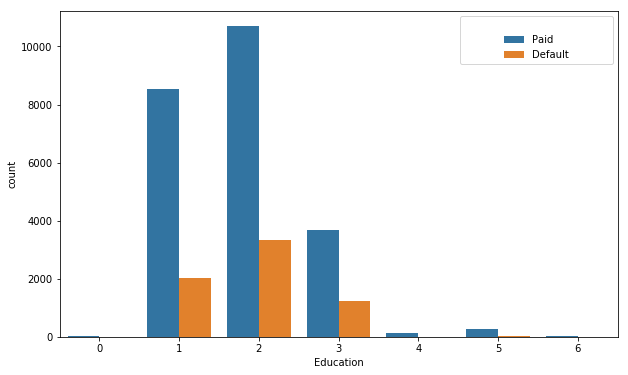

In [11]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

p = sns.countplot(creditcard_df['Education'], hue="Default payment next month", data=creditcard_df)

leg = p.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

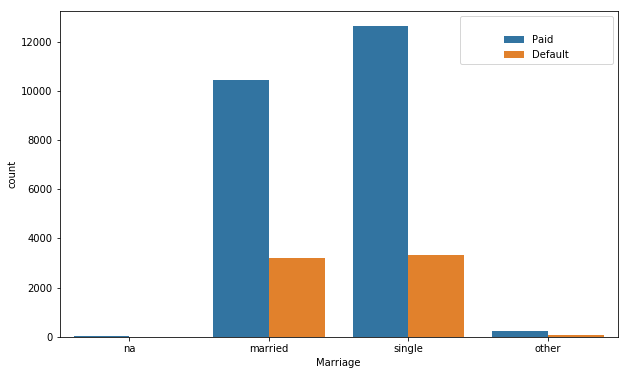

In [12]:
fig = plt.figure(figsize=(10,6))

marriage = creditcard_df['Marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

q = sns.countplot(marriage, hue="Default payment next month", data=creditcard_df)

leg = q.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

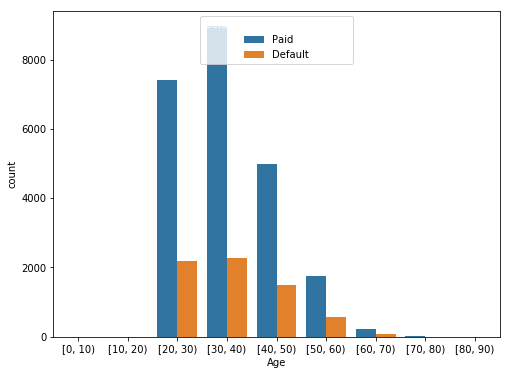

In [13]:
Age_cat = pd.cut(creditcard_df['Age'], range(0, 100, 10), right=False)

fig = plt.figure(figsize=(8,6))

r = sns.countplot(Age_cat, hue="Default payment next month", data=creditcard_df)

leg = r.get_legend()
#leg.set_title("Target")
labs = leg.texts
labs[0].set_text("Paid")
labs[1].set_text("Default")
leg.get_title().set_color('white')

plt.show()

In [14]:
new_df = pd.DataFrame({'Age': Age_cat})

In [15]:
creditcard_df.update(new_df)

In [16]:
creditcard_df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,"[20, 30)",2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,"[20, 30)",-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,"[30, 40)",0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,"[30, 40)",0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,"[50, 60)",-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
creditcard_df.groupby('Age').size()

Age
[20, 30)     9618
[30, 40)    11238
[40, 50)     6464
[50, 60)     2341
[60, 70)      314
[70, 80)       25
dtype: int64

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

creditcard_df['Age'] = le.fit_transform(creditcard_df['Age'])

In [19]:
creditcard_df.head()

,Limit_Bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Default payment next month
0,20000,2,2,1,0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
import re

pattern = re.compile("^Pay_[0-9]+$")
pay_status_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[pay_status_columns].head(10)

,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


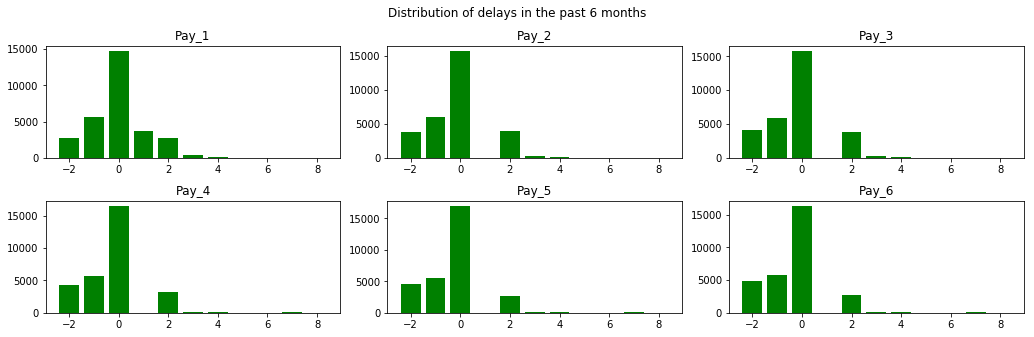

In [21]:
# pay status columns
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = creditcard_df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [22]:
# bill columns
pattern = re.compile("^Bill_Amt[0-9]+$")
bill_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[bill_columns].describe()

,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [23]:
creditcard_df[bill_columns].head(10)

,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


In [24]:
# pay status columns
pattern = re.compile("^Pay_Amt[0-9]+$")
pay_amount_columns = [ x for x in creditcard_df.columns if (pattern.match(x))]
creditcard_df[pay_amount_columns].describe()

,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [25]:
creditcard_df[pay_amount_columns].head(10)

,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0


In [26]:
creditcard_df['Limit_Bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Limit_Bal, dtype: float64

In [27]:
creditcard_df.shape

(30000, 24)

In [28]:
''''import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(12,8))

corr = creditcard_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)'''

"'import seaborn as sns\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.subplots(figsize=(12,8))\n\ncorr = creditcard_df.corr()\nsns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)"

In [29]:
'''cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())'''

'cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)\n\ndef magnify():\n    return [dict(selector="th",\n                 props=[("font-size", "7pt")]),\n            dict(selector="td",\n                 props=[(\'padding\', "0em 0em")]),\n            dict(selector="th:hover",\n                 props=[("font-size", "12pt")]),\n            dict(selector="tr:hover td:hover",\n                 props=[(\'max-width\', \'200px\'),\n                        (\'font-size\', \'12pt\')])\n]\n\ncorr.style.background_gradient(cmap, axis=1)    .set_properties(**{\'max-width\': \'80px\', \'font-size\': \'10pt\'})    .set_caption("Hover to magify")    .set_precision(2)    .set_table_styles(magnify())'

In [30]:
from sklearn.ensemble import RandomForestClassifier

Y = creditcard_df['Default payment next month']
X = creditcard_df.drop('Default payment next month', axis=1)

clf = RandomForestClassifier()
clf.fit(X,Y)

# Estimate the importance of each features
feature_import = pd.DataFrame(data=clf.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,Pay_1,Limit_Bal,Bill_Amt1,Bill_Amt2,Bill_Amt3,Pay_Amt1,Bill_Amt6,Bill_Amt4,Pay_Amt6,Bill_Amt5,...,Pay_Amt4,Pay_2,Pay_4,Age,Pay_5,Pay_3,Education,Pay_6,Marriage,Sex
values,0.105009,0.065903,0.060997,0.055767,0.05364,0.05361,0.053548,0.053502,0.051592,0.051537,...,0.045479,0.032632,0.029589,0.027519,0.024574,0.024394,0.022373,0.018189,0.015222,0.013039


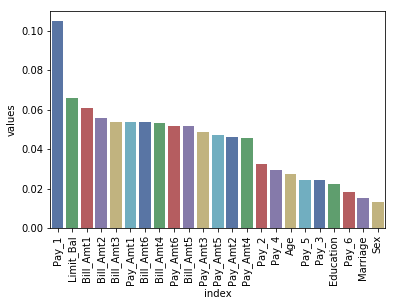

In [31]:
from matplotlib import pyplot

feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
#sns.set(rc={'figure.figsize':(18,18)}) #font_scale=3
pyplot.xticks(rotation=90)
pyplot.show()

In [32]:
features_Importance = {}

for feat, importance in zip(X.columns, clf.feature_importances_):
    features_Importance[feat] = importance
#print 'feature: {f}, importance: {i}'.format(f=feat, i=importance)

In [33]:
import pandas

pandas.DataFrame.from_dict(features_Importance, orient='index')

,0
Pay_6,0.018189
Pay_4,0.029589
Pay_5,0.024574
Pay_2,0.032632
Pay_3,0.024394
Pay_1,0.105009
Age,0.027519
Marriage,0.015222
Bill_Amt5,0.051537
Bill_Amt4,0.053502


In [34]:
'''from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy
import matplotlib.pyplot as plt


array = creditcard_df.values
X = array[:,0:23]
Y = array[:,23]

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X,Y)

numpy.set_printoptions(precision=3)
print (fit.n_features_)
print (fit.support_)
print (fit.ranking_)

# Plot pixel ranking
#plt.matshow(ranking, cmap=plt.cm.Blues)
#plt.colorbar()
#plt.title("Ranking of pixels with RFE")
#plt.show()'''

'from sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nimport numpy\nimport matplotlib.pyplot as plt\n\n\narray = creditcard_df.values\nX = array[:,0:23]\nY = array[:,23]\n\nmodel = LogisticRegression()\nrfe = RFE(model, 5)\nfit = rfe.fit(X,Y)\n\nnumpy.set_printoptions(precision=3)\nprint (fit.n_features_)\nprint (fit.support_)\nprint (fit.ranking_)\n\n# Plot pixel ranking\n#plt.matshow(ranking, cmap=plt.cm.Blues)\n#plt.colorbar()\n#plt.title("Ranking of pixels with RFE")\n#plt.show()'

In [35]:
'''keys = ['Limit_Bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1','Pay_2', 'Pay_3', 'Pay_4', 
        'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5',
       'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4',
       'Pay_Amt5', 'Pay_Amt6', 'Default payment next month']'''

"keys = ['Limit_Bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_1','Pay_2', 'Pay_3', 'Pay_4', \n        'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5',\n       'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4',\n       'Pay_Amt5', 'Pay_Amt6', 'Default payment next month']"

In [36]:
'''feature_dict = dict(zip(keys, fit.ranking_))
feature_dict'''

'feature_dict = dict(zip(keys, fit.ranking_))\nfeature_dict'

In [37]:
'''Importance_features = [key for key, value in feature_dict.iteritems() if value ==1]
Importance_features'''

'Importance_features = [key for key, value in feature_dict.iteritems() if value ==1]\nImportance_features'

In [38]:
'''Y_df = creditcard_df['Default payment next month']
X_df = creditcard_df.drop('Default payment next month', axis=1)'''

"Y_df = creditcard_df['Default payment next month']\nX_df = creditcard_df.drop('Default payment next month', axis=1)"

In [39]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
import numpy as np

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [40]:
'''Selected_features = creditcard_df[features_Importance]
Selected_features.head()'''

'Selected_features = creditcard_df[features_Importance]\nSelected_features.head()'

In [41]:
'''creditcard_df = Selected_features.join(Y_df)
creditcard_df.head()'''

'creditcard_df = Selected_features.join(Y_df)\ncreditcard_df.head()'

In [42]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Y = creditcard_df['Default payment next month']
X_unscale = creditcard_df.drop('Default payment next month', axis=1)

scale = StandardScaler()

X = preprocessing.scale(X_unscale)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.810958 (0.009393)
LDA: 0.811708 (0.008820)
KNN: 0.790792 (0.007485)
DT: 0.724250 (0.012405)
NB: 0.674167 (0.036476)
RF: 0.803917 (0.010372)


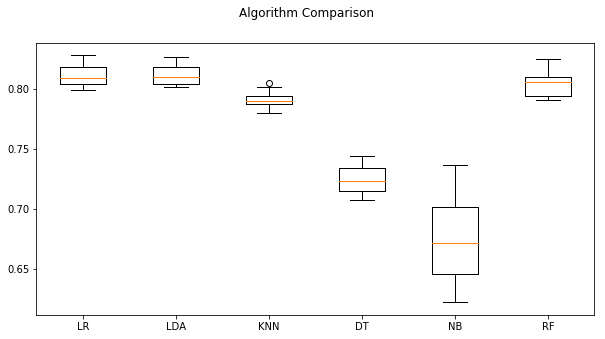

In [44]:
# Compare Algorithms
from matplotlib import pyplot

fig = pyplot.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [45]:
'''from sklearn.model_selection import cross_val_predict

# with cross-valdidation
kfold = KFold(n_splits=10, random_state=seed)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
#y_train_pred = lr.predict_proba(X_train)[:,1]
y_train_pred = cross_val_predict(lr, X_train, Y_train, cv=kfold)
#y_test_pred = lr.predict_proba(X_validation)[:,1]

plot_cm(ax[0],  Y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)

#threshold = 0.5

#fig,ax = plt.subplots(1,3)
#fig.set_size_inches(15,5)

plot_cm(ax[0],  Y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
#plot_cm(ax[1],  Y_validation, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
#plot_auc(ax[2], Y_train, y_train_pred, Y_validation, y_test_pred, threshold)
    
#plt.tight_layout()
#plt.show()'''   

"from sklearn.model_selection import cross_val_predict\n\n# with cross-valdidation\nkfold = KFold(n_splits=10, random_state=seed)\n\nlr = LogisticRegression()\nlr.fit(X_train, Y_train)\n#y_train_pred = lr.predict_proba(X_train)[:,1]\ny_train_pred = cross_val_predict(lr, X_train, Y_train, cv=kfold)\n#y_test_pred = lr.predict_proba(X_validation)[:,1]\n\nplot_cm(ax[0],  Y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)\n\n#threshold = 0.5\n\n#fig,ax = plt.subplots(1,3)\n#fig.set_size_inches(15,5)\n\nplot_cm(ax[0],  Y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)\n#plot_cm(ax[1],  Y_validation, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)\n#plot_auc(ax[2], Y_train, y_train_pred, Y_validation, y_test_pred, threshold)\n    \n#plt.tight_layout()\n#plt.show()"

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import classification_report

pandas.set_option('display.float_format', lambda x: '%.3f' % x)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

'''labels = [0, 1]
cm = confusion_matrix(Y_validation, predictions, labels)
print(cm)
fig = plt.figure()

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

plt.show()'''

print(classification_report(Y_validation, predictions))

0.8115
[[4546  164]
 [ 967  323]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      4710
          1       0.66      0.25      0.36      1290

avg / total       0.79      0.81      0.78      6000



In [53]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=14)
    plt.show()

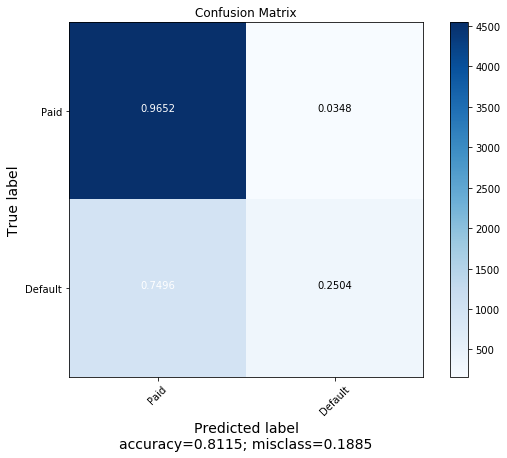

In [57]:
plot_confusion_matrix(cm           = np.array([[4546, 164],
                                               [ 967, 323]]),
                     
                      normalize    = True, 
                      target_names = ['Paid', 'Default'],
                      title        = "Confusion Matrix")